In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
infile_name = "./example.txt"
infile = open(infile_name, "r")
for line in infile:
    l = line.split(',')
    print(l)

['50.02', '556:254', '42:10:10', '750000', '210000', 'A', '201604\n']
['0.00', '211:1254', '64', '150000', '410000', 'F', '201510\n']
['0.00', '51:2222', '30:28:26:4:1', '120000', '170000', 'D', '201702\n']
['0.00', '365:117', '33:27:5', '180000', '430000', 'B', '201411\n']


In [56]:
fname = "housing.csv"
data = pd.read_csv(fname)
data = data.drop(columns = ['ocean_proximity'])
data.columns = ['longitude','latitude',
                'housingMedianAge','totalRooms', 
                'totalBedrooms',
                'population','households',
                'medianIncome','medianHouseValue']
data.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Data Description

In [57]:
data.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data cleaning

In [58]:
data.isnull().sum()

longitude             0
latitude              0
housingMedianAge      0
totalRooms            0
totalBedrooms       207
population            0
households            0
medianIncome          0
medianHouseValue      0
dtype: int64

In [59]:
data = data.dropna(axis = 'rows')
data.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data visualization (EDA: Exploratory data analysis)

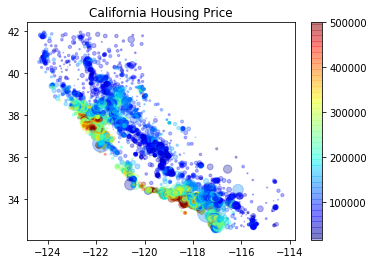

In [69]:
# Colormap
plt.scatter(data['longitude'], data['latitude'], s = data['population']/100,
           alpha = 0.3, c = data['medianHouseValue'], cmap = plt.get_cmap('jet'))
plt.title('California Housing Price')
plt.colorbar()
plt.show()

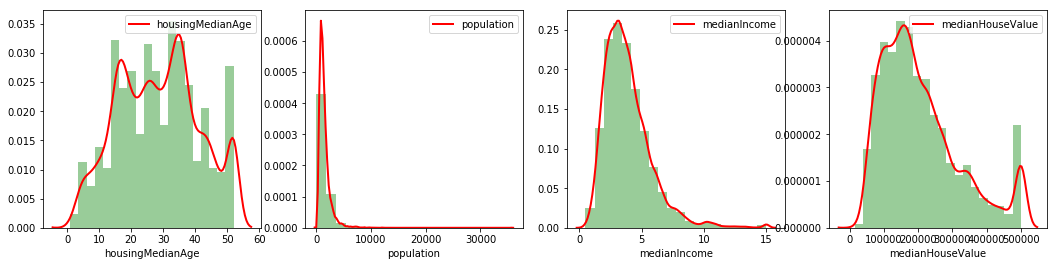

In [71]:
# Histogram
import seaborn as sns
feature = ['housingMedianAge', 'population', 'medianIncome', 'medianHouseValue']
index = 0
plt.figure(figsize = (18, 4))
for fea in feature:
    index += 1
    plt.subplot(1, 4, index)
    plt.xlabel(fea)
    sns.distplot(data[fea], kde=True, bins=20,color='g',kde_kws={"color": "r", "lw": 2, "label": fea})

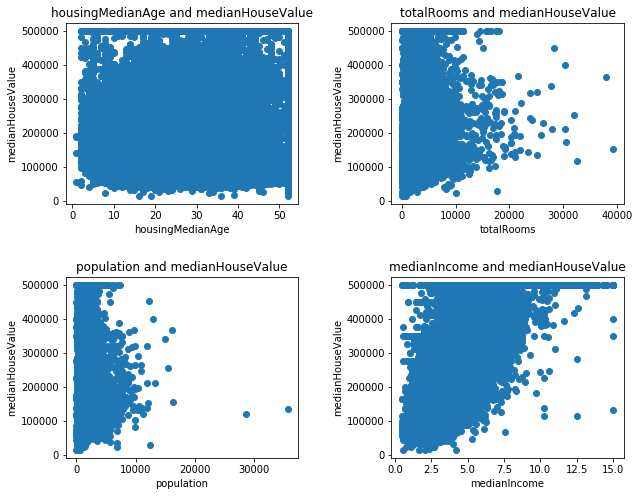

In [74]:
# scatter plot
feature = ['housingMedianAge','totalRooms','population','medianIncome']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(wspace=.4, hspace=.4)
for i in range(4):
    row, col = i // 2, i % 2
    axes[row][col].scatter(data[feature[i]],data['medianHouseValue'])
    axes[row][col].set_title(feature[i] + ' and medianHouseValue')
    axes[row][col].set_xlabel(feature[i])        
    axes[row][col].set_ylabel('medianHouseValue')
plt.show()


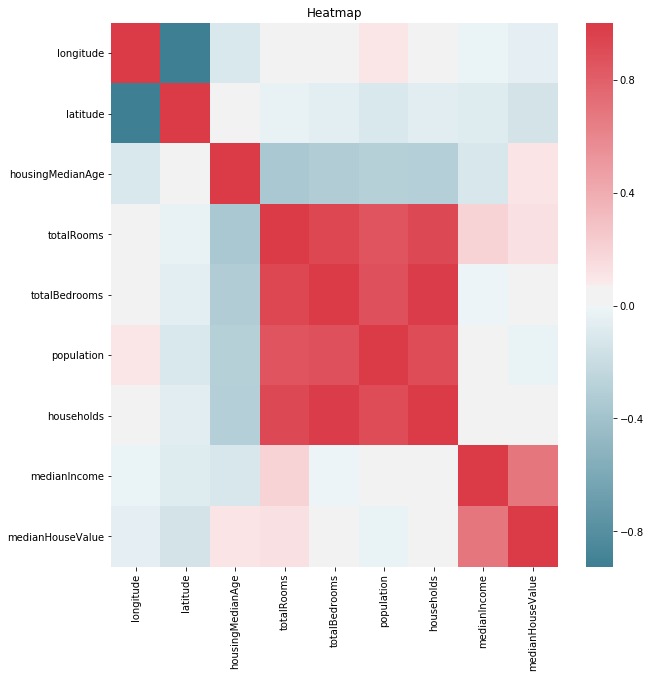

In [77]:
# heatmap
plt.subplots(figsize=(10, 10))
plt.title("Heatmap")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap)
plt.show()

# Model building

In [79]:
n_sample = len(data)
print(n_sample)

20433


In [95]:
features = data.drop(['medianHouseValue'], 1)
X_test = features[-1000:]
X_train = features[:n_sample-1000]
target = data['medianHouseValue']/10000
y_test = target[-1000:]
y_train = target[:n_sample-1000]

In [96]:
# linear regression
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train) #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
model_LR.coef_

array([-4.24484706e+00, -4.23349522e+00,  1.17809007e-01, -8.51647677e-04,
        1.12706590e-02, -3.88917383e-03,  5.16872592e-03,  4.05256199e+00])

In [98]:
model_LR.intercept_

-355.9027978005427

In [99]:
# Prediction
y_true = y_test
y_pred = model_LR.predict(X_test)

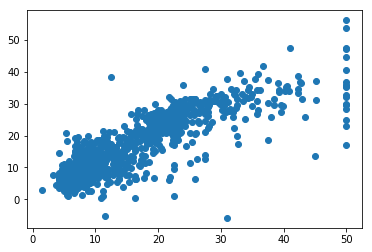

In [100]:
plt.plot(y_true, y_pred, 'o')
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("RMSE: ", np.sqrt(mean_squared_error(y_true, y_pred)))
print("R2: ", r2_score(y_true, y_pred))
print("MAE: ", mean_absolute_error(y_true, y_pred))

RMSE:  5.5196223439260494
R2:  0.700730005729019
MAE:  3.934185270705717
